<a href="https://colab.research.google.com/github/JuanD-Silva/Universidad/blob/main/IA/Ejemplo_Megaquilidos_B%C3%BAsqueda_informada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Formulación problemas de búsqueda__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal


    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, node, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def is_goal(self, node):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        return self.goal == node

    def action_cost(self, s, a, s1):
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError

    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost  # Ahora la clase almacena su costo

    def states_path(self):
        if self.parent is None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        if self.parent is None:
            return []
        return self.parent.actions_path() + [self.action]

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False

    def __lt__(self, other):
        """Define la comparación entre nodos basada en su costo."""
        return self.cost < other.cost

    def path_cost(self):
        if self.parent is None:
            return self.cost
        return self.cost + self.parent.path_cost()

    def __repr__(self):
        return self.state


## Estructuras de datos - Cola de Prioridad

In [ ]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

# UCS

In [ ]:
def UCS(problem, fringe=PriorityQueue()):
    """
    Algoritmo de Búsqueda de Costo Uniforme (Uniform Cost Search, UCS).

    Parameters:
        problem: El problema que se está resolviendo.
        fringe (PriorityQueue, opcional): Cola de prioridad que almacena los nodos a expandir.

    Returns:
        El nodo objetivo si se encuentra la solución, de lo contrario None.
    """
    closed = []  # Lista de nodos ya explorados
    fringe.put((0, problem.initial))  # Insertamos el nodo inicial con costo 0

    while True:
        cost, node = fringe.get()  # Extraemos el nodo con menor costo

        if problem.is_goal(node):
            return node

        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.put((problem.g(child), child))  # Insertamos con su costo


# VORAZ

In [ ]:
from queue import PriorityQueue

def expand(problem, node):
    """
    Expande un nodo generando sus nodos hijos según las acciones disponibles en el problema.

    Parameters:
        problem: El problema que se está resolviendo.
        node: El nodo actual que se va a expandir.

    Returns:
        list: Lista de nodos hijos generados a partir del nodo actual.
    """
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def voraz(problem, fringe=PriorityQueue()):
    """
    Algoritmo de búsqueda voraz.

    Parameters:
        problem: El problema que se está resolviendo.
        fringe (PriorityQueue, opcional): Cola de prioridad que almacena los nodos a expandir,
        ordenados según su heurística.

    Returns:
        El nodo objetivo si se encuentra la solución, de lo contrario None.
    """
    closed = []
    fringe.put((problem.h(problem.initial), problem.initial))  # Insertamos el nodo inicial con su heurística

    while True:
        _, node = fringe.get()  # Extraemos el nodo con menor valor heurístico

        if problem.is_goal(node):
            return node

        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.put((problem.h(child), child))  # Insertamos con su valor heurístico

def heuristic_cost(problem, solution):
    """
    Calcula el costo heurístico total de una solución.

    Parameters:
        problem: El problema que se está resolviendo.
        solution: La solución encontrada representada como un nodo.

    Returns:
        int: La suma de los valores heurísticos de todos los nodos en el camino de la solución.
    """
    total_heuristic = 0
    for node in solution.states_path():
        total_heuristic += problem.h(node)
    return total_heuristic


# A*

In [ ]:
from queue import PriorityQueue

def expand(problem, node):
    """
    Expande un nodo generando sus nodos hijos según las acciones disponibles en el problema.

    Parameters:
        problem: El problema que se está resolviendo.
        node: El nodo actual que se va a expandir.

    Returns:
        list: Lista de nodos hijos generados a partir del nodo actual.
    """
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def voraz(problem, fringe=PriorityQueue()):
    """
    Algoritmo de búsqueda voraz.

    Parameters:
        problem: El problema que se está resolviendo.
        fringe (PriorityQueue, opcional): Cola de prioridad que almacena los nodos a expandir,
        ordenados según su heurística.

    Returns:
        El nodo objetivo si se encuentra la solución, de lo contrario None.
    """
    closed = []
    fringe.put((problem.h(problem.initial), problem.initial))  # Insertamos el nodo inicial con su heurística

    while True:
        _, node = fringe.get()  # Extraemos el nodo con menor valor heurístico

        if problem.is_goal(node):
            return node

        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.put((problem.h(child), child))  # Insertamos con su valor heurístico

def a_star(problem, fringe=PriorityQueue()):
    """
    Algoritmo de búsqueda A*.

    Parameters:
        problem: El problema que se está resolviendo.
        fringe (PriorityQueue, opcional): Cola de prioridad que almacena los nodos a expandir,
        ordenados según f(n) = g(n) + h(n).

    Returns:
        El nodo objetivo si se encuentra la solución, de lo contrario None.
    """
    closed = []
    fringe.put((problem.f(problem.initial), problem.initial))  # Insertamos el nodo inicial con f(n)

    while not fringe.empty():
        _, node = fringe.get()  # Extraemos el nodo con menor f(n)

        if problem.is_goal(node):
            return node

        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.put((problem.f(child), child))  # Insertamos con su valor f(n)

def heuristic_cost(problem, solution):
    """
    Calcula el costo heurístico total de una solución.

    Parameters:
        problem: El problema que se está resolviendo.
        solution: La solución encontrada representada como un nodo.

    Returns:
        int: La suma de los valores heurísticos de todos los nodos en el camino de la solución.
    """
    total_heuristic = 0
    for node in solution.states_path():
        total_heuristic += problem.h(node)
    return total_heuristic


# Búsqueda informada sobre un grafo simple




![Picture title](image-20230228-191924.png)

In [ ]:
class SimpleGraph(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    moves = {
        'S':['move-A', 'move-D'],
        'A':['move-B', 'move-G'],
        'D':['move-B', 'move-E'],
        'B':['move-E', 'move-C'],
        'C':['move-G'],
        'E':['move-G']}
    return moves[node.state]

  def result(self, node, action):
    new_state = {
            'move-A': 'A',
            'move-B': 'B',
            'move-C': 'C',
            'move-D': 'D',
            'move-E': 'E',
            'move-G': 'G',
            'move-S': 'S'
    }
    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action, new_node)
    new_node.cost = new_cost
    return new_node

  def action_cost(self, node, action, succesor):
    cost = {
        ('S', 'D'): 2,
        ('S', 'A'): 3,
        ('A', 'B'): 5,
        ('A', 'G'): 10,
        ('D', 'B'): 1,
        ('D', 'E'): 4,
        ('B', 'C'): 2,
        ('B', 'E'): 1,
        ('C', 'G'): 4,
        ('E', 'G'): 3}
    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic = {
        'S':7,
        'A':9,
        'D':5,
        'B':4,
        'C':2,
        'E':3,
        'G':0}
    return heuristic[node.state]


In [ ]:
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo de costo uniforme:')
solution = UCS(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))

Algoritmo de costo uniforme:
Action sequence: ['move-D', 'move-B', 'move-E', 'move-G']
State sequence: [S, D, B, E, G]
Cost: 7


## VORAZ

In [ ]:
# completar
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo VORAZ:')
solution = voraz(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', [node.state for node in solution.states_path()])
print('Heuristic cost:', heuristic_cost(simple_graph, solution))

Algoritmo VORAZ:
Action sequence: ['move-D', 'move-E', 'move-G']
State sequence: ['S', 'D', 'E', 'G']
Heuristic cost: 15


## A*

In [ ]:
# completar
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo A*:')
solution = a_star(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', [node.state for node in solution.states_path()])
print('Cost:', simple_graph.g(solution))  # Costo del grafo
print('Heuristic cost:', heuristic_cost(simple_graph, solution))

Algoritmo A*:
Action sequence: ['move-D', 'move-B', 'move-E', 'move-G']
State sequence: ['S', 'D', 'B', 'E', 'G']
Cost: 7
Heuristic cost: 19


<BarContainer object of 2 artists>

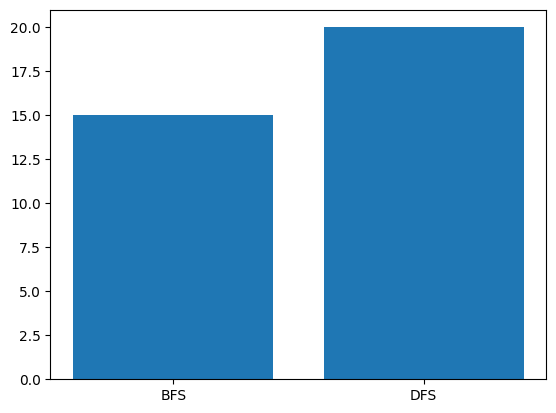

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['BFS', 'DFS'], [15, 20])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0b0ade9-403e-4acd-8eb4-c13a981e30c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>